In [1]:
cd c:/Users/Alex/source/repos/ILDARSrevised

c:\Users\Alex\source\repos\ILDARSrevised


C:\Users\Alex\AppData\Roaming\Python\Python311\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
def shorten_names(algorithms_str):
  return algorithms_str \
    .replace("INVERSION","I\n\n") \
    .replace("GNOMONIC_PROJECTION","G\n\n") \
    .replace("DBSCAN","S\n\n") \
    .replace("ALL_PAIRS","A\n\n") \
    .replace("DISJOINT_PAIRS","D\n\n") \
    .replace("OVERLAPPING_PAIRS","O\n\n") \
    .replace("LARGEST_REFLECTION_CLUSTER","L\n\n") \
    .replace("NARROWEST_CLUSTER","N\n\n") \
    .replace("UNWEIGHTED_AVERAGE","U\n\n") \
    .replace("CLOSEST_LINES_EXTENDED","E\n\n") \
    .replace("CLOSEST_LINES","C\n\n") \
    .replace("MAP_TO_NORMAL_VECTOR","M\n\n") \
    .replace("REFLECTION_GEOMETRY","R\n\n") \
    .replace("WALL_DIRECTION","W\n\n") \
    .replace("-","")


# def sort_csv_files(folder_path, column_index, key):
#     files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
#     sorted_files = []

#     for file_name in files:
#         file_path = os.path.join(folder_path, file_name)
#         with open(file_path, 'r') as file:
#             csv_data = csv.reader(file)
#             data_list = list(csv_data)[1:]  # Exclude the header row
#             column_values = [float(row[column_index]) for row in data_list]
#             column_sort_value = key(column_values)
#             sorted_files.append((file_name.split("/")[-1].split(".")[0], column_sort_value))

#     sorted_files.sort(key=lambda item: item[1])

#     return sorted_files

def sort_csv_files(folder_path, column_index, key_function):
    sorted_files = []

    for file_name in os.listdir(folder_path):
        if file_name.endswith(".csv"):
            file_path = os.path.join(folder_path, file_name)

            with open(file_path, newline='') as file:
                csv_data = csv.reader(file)
                data_list = list(csv_data)[1:]  # Exclude the header row

                try:
                    column_values = [float(row[column_index]) for row in data_list if row[column_index].strip()]
                    column_sort_value = key_function(column_values)
                    sorted_files.append((file_name.split("/")[-1].split(".")[0], column_sort_value))
                except ValueError:
                    print(f"Skipping file {file_name} due to invalid values.")

    sorted_files.sort(key=lambda x: x[1])
    return sorted_files

In [3]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


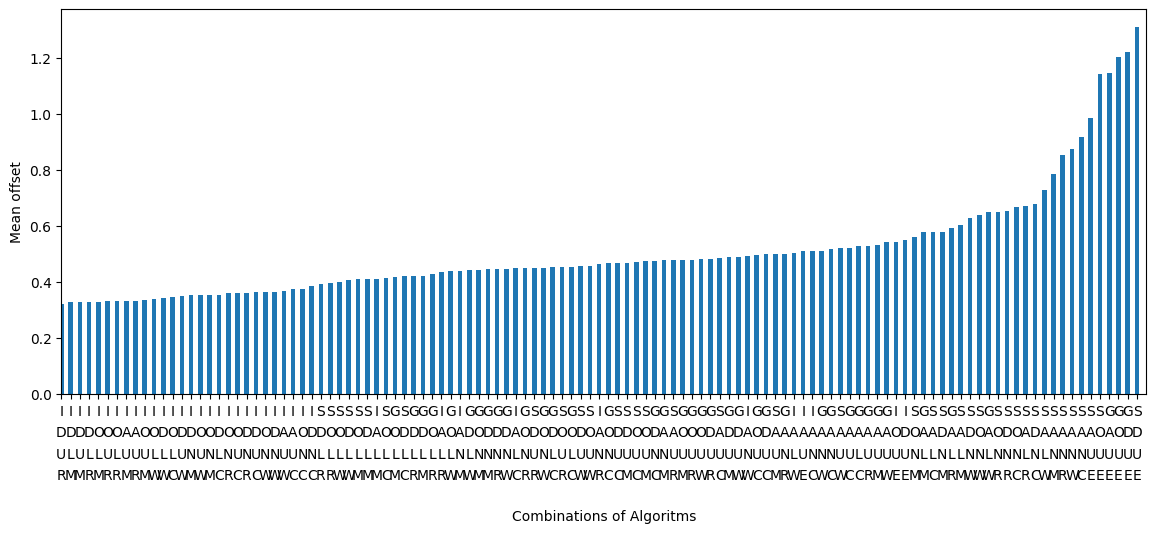

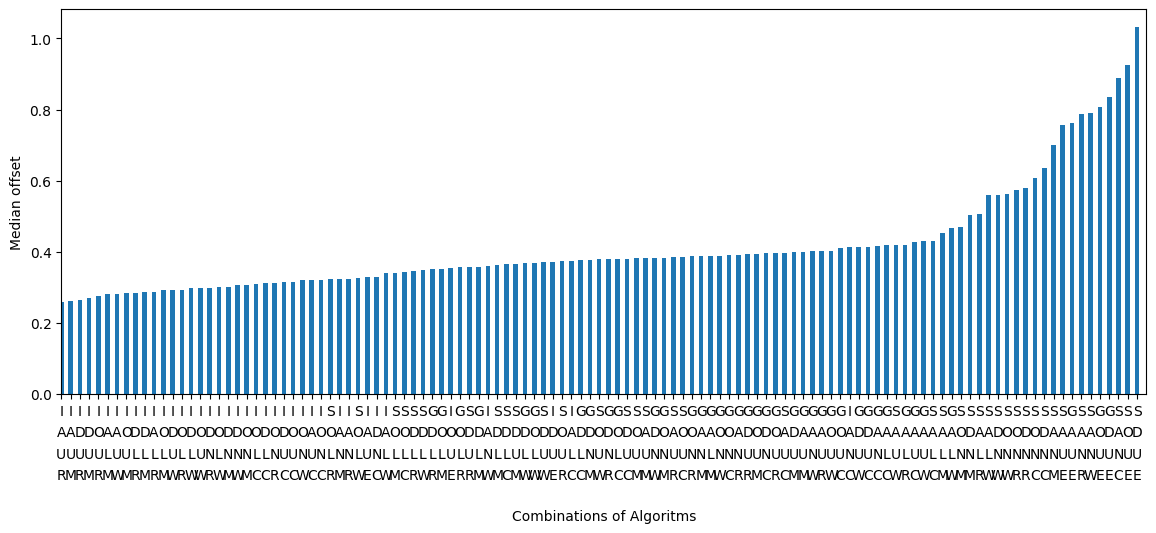

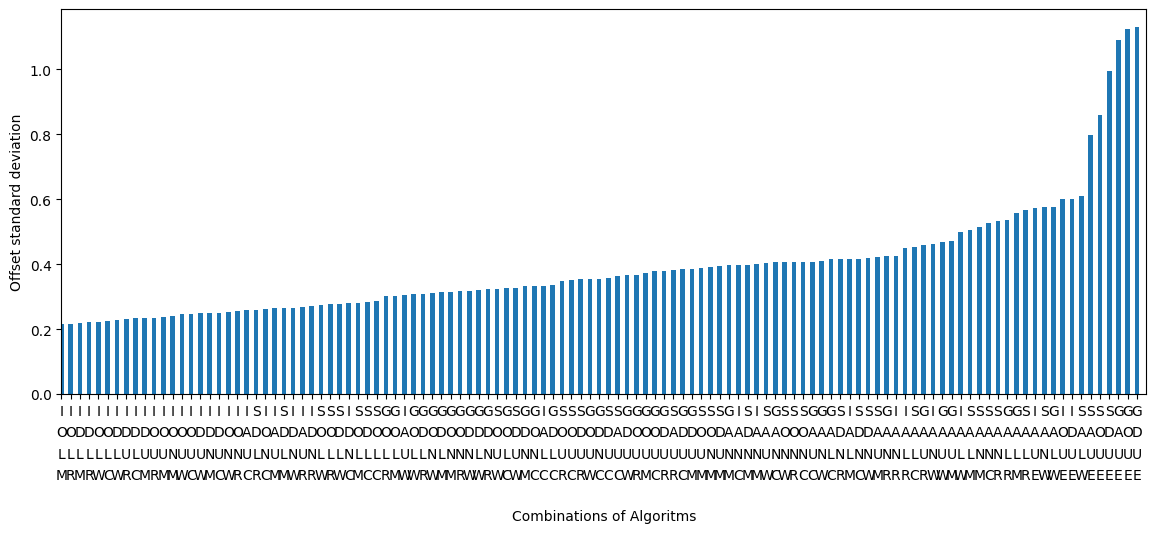

Sum of Means: 59.57
Sum of Medians: 48.32
Sum of Standard Deviations: 45.87

Sum of INVERSION Means: 15.08
Sum of INVERSION Medians: 12.08
Sum of INVERSION Standard Deviations: 12.06

Sum of GNOMONIC_PROJECTION Means: 21.05
Sum of GNOMONIC_PROJECTION Medians: 16.59
Sum of GNOMONIC_PROJECTION Standard Deviations: 16.99

Sum of DBSCAN Means: 23.44
Sum of DBSCAN Medians: 19.66
Sum of DBSCAN Standard Deviations: 16.83



In [16]:
import os
import csv
import matplotlib.pyplot as plt
from pathlib import Path
from statistics import mean, median, stdev
import matplotlib.pyplot as plt
from tabulate import tabulate

folder_name = '100test1roomGP3andINVandDBnoError06-20'

def calculate_sums(sorted_files):
    values = [item[1] for item in sorted_files]
    sum_of_values = sum(values)

    return sum_of_values

def filter_files_by_algorithm(sorted_files, algorithm_letters):
    return [item for item in sorted_files if any(letter in item[0] for letter in algorithm_letters)]

def plot_sorted_data(sorted_files, plotname, name_y_axis):
    #file_names = [item[0][0] for item in sorted_files3]
    file_names = [item[0] for item in sorted_files]
    std_values = [item[1] for item in sorted_files]

    plt.figure(figsize=(14, 5))
    x_pos = range(len(file_names))
    plt.bar(x_pos, std_values, width=0.5)
    plt.xticks(x_pos, [shorten_names(f) for f in file_names], linespacing=0.7)
    plt.xlabel('Combinations of Algoritms')
    plt.ylabel(name_y_axis)
    plt.xlim(0,len(file_names))
    #save_path = base_dir / 'results/ImageResults/' / folder_name
    #save_path.mkdir(parents=True, exist_ok=True)
    plt.savefig(save_path / f'06-20{plotname}', pad_inches=0, bbox_inches='tight')
    #plt.tight_layout()
    #plt.subplots_adjust(bottom=0.3)

    plt.show()

# Function to find the project directory dynamically
def find_project_dir():
    current_dir = Path.cwd()  # Get the current working directory
    while str(current_dir) != '/':  # Traverse up the directory tree until root
        if 'ILDARSrevised' in os.listdir(current_dir):
            return current_dir / 'ILDARSrevised'
        current_dir = current_dir.parent
    raise FileNotFoundError("Project directory 'ILDARSrevised' not found.")

# Find the project directory dynamically
base_dir = find_project_dir()
save_path = base_dir / 'results/ImageResults/' / folder_name
save_path.mkdir(parents=True, exist_ok=True)

#results_root = sorted(os.listdir('c:/Users/Alex/source/repos/ILDARSrevised/results'), reverse=True)
#results_root = [f for f in results_root if not f.startswith("ImageResults")]
#most_recent_folder = results_root[0]
#folder_path = f'/content/drive/MyDrive/ILDARSrevised/results/{most_recent_folder}/'
folder_path = base_dir / 'results' / folder_name
column_index = 3  # Replace with the index of the column to calculate the mean (0-based index)

sorted_by_mean = sort_csv_files(folder_path, column_index, mean)
plot_sorted_data(sorted_by_mean, "bymean", "Mean offset")

sorted_by_median = sort_csv_files(folder_path, column_index, median)
plot_sorted_data(sorted_by_median, "bymedian", "Median offset")

sorted_by_std_dev = sort_csv_files(folder_path, column_index, stdev)
plot_sorted_data(sorted_by_std_dev, "bystddev", "Offset standard deviation")

sum_of_means = calculate_sums(sorted_by_mean)
sum_of_medians = calculate_sums(sorted_by_median)
sum_of_std_devs = calculate_sums(sorted_by_std_dev)

# Calculate and print sums for the specific algorithms (I, G, S)
algorithm_letters = ['INVERSION', 'GNOMONIC_PROJECTION', 'DBSCAN']

print(f"Sum of Means: {sum_of_means:.2f}")
print(f"Sum of Medians: {sum_of_medians:.2f}")
print(f"Sum of Standard Deviations: {sum_of_std_devs:.2f}\n")

# Save the total sums to a text file
txt_file_path = save_path / 'results.txt'
with open(txt_file_path, 'w') as f:
    f.write(f"Sum of Means: {sum_of_means:.2f}\n")
    f.write(f"Sum of Medians: {sum_of_medians:.2f}\n")
    f.write(f"Sum of Standard Deviations: {sum_of_std_devs:.2f}\n\n")

for letter in algorithm_letters:
    filtered_means = filter_files_by_algorithm(sorted_by_mean, [letter])
    filtered_medians = filter_files_by_algorithm(sorted_by_median, [letter])
    filtered_std_devs = filter_files_by_algorithm(sorted_by_std_dev, [letter])

    sum_of_means_specific = calculate_sums(filtered_means)
    sum_of_medians_specific = calculate_sums(filtered_medians)
    sum_of_std_devs_specific = calculate_sums(filtered_std_devs)

    print(f"Sum of {letter} Means: {sum_of_means_specific:.2f}")
    print(f"Sum of {letter} Medians: {sum_of_medians_specific:.2f}")
    print(f"Sum of {letter} Standard Deviations: {sum_of_std_devs_specific:.2f}\n")

    # Save the values to a text file
    txt_file_path = save_path / 'results.txt'
    with open(txt_file_path, 'a') as f:
        f.write(f"Sum of {letter} Means: {sum_of_means_specific:.2f}\n")
        f.write(f"Sum of {letter} Medians: {sum_of_medians_specific:.2f}\n")
        f.write(f"Sum of {letter} Standard Deviations: {sum_of_std_devs_specific:.2f}\n")